In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
# open csv file as dataframe
df = pd.read_csv("final_data_cleaned_processed_test.csv")

df.head()

,PC6,Date,Consumed_kWh(t+4),Consumed_kWh(t+3),Consumed_kWh(t+2),Consumed_kWh(t+1),Consumed_kWh(t-0),Consumed_kWh(t-1),Consumed_kWh(t-2),Consumed_kWh(t-3),Consumed_kWh(t-4),Consumed_kWh(t-5),Consumed_kWh(t-6),Consumed_kWh(t-7),Blocked_kWh(t+4),Blocked_kWh(t+3),Blocked_kWh(t+2),Blocked_kWh(t+1),Blocked_kWh(t-0),Blocked_kWh(t-1),Blocked_kWh(t-2),Blocked_kWh(t-3),Blocked_kWh(t-4),Blocked_kWh(t-5),Blocked_kWh(t-6),Blocked_kWh(t-7),Consumed_kWh_lag(t-0),Consumed_kWh_lag(t-1),Consumed_kWh_lag(t-2),Consumed_kWh_lag(t-3),Consumed_kWh_lag(t-4),Consumed_kWh_lag(t-5),Consumed_kWh_lag(t-6),Consumed_kWh_lag(t-7),Blocked_kWh_lag(t-0),Blocked_kWh_lag(t-1),Blocked_kWh_lag(t-2),Blocked_kWh_lag(t-3),Blocked_kWh_lag(t-4),Blocked_kWh_lag(t-5),Blocked_kWh_lag(t-6),Blocked_kWh_lag(t-7),MaxPower(t+4),MaxPower(t+3),MaxPower(t+2),MaxPower(t+1),MaxPower(t-0),number_of_chargers(t+4),number_of_chargers(t+3),number_of_chargers(t+2),number_of_chargers(t+1),number_of_chargers(t-0),PC6_WeekIndex,WeekIndex,SinWeekOfYear,CosWeekOfYear,SinMonthOfYear,CosMonthOfYear,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore
0,1011AB,2023-01-02,849.17,1014.46,819.15,775.17,811.41,750.90,1018.33,1010.84,951.80,585.01,1130.80,928.42,1745.1480,2206.8408,1545.6000,2016.8976,1323.4200,2322.6504,2851.6320,1946.5176,1893.2496,1589.4840,1989.1320,1433.9304,0.054752,0.050669,0.068714,0.068209,0.064225,0.039475,0.076304,0.062648,0.021924,0.038477,0.047240,0.032246,0.031363,0.026331,0.032952,0.023754,0.026843,0.026843,0.026843,0.026843,0.026843,0.065217,0.065217,0.065217,0.065217,0.065217,1011AB52,0.800000,0.560268,0.996354,0.75,0.933013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065217,0.0,0.0,0.010829,0.009594,0.010947,0.011053,0.011507,0.013425,0.013506,0.014083,0.016602,0.029952,0.039184,0.046006,0.043694,0.038033,0.032552,0.032475,0.034486,0.029095,0.020315,0.015550,0.021212,0.020406,0.019698,0.017301,0.010842,0.009618,0.008935,0.008970,0.009422,0.011325,0.011462,0.011924,0.014721,0.032499,0.038698,0.042008,0.036332,0.020664,0.014327,0.017116,0.024712,0.021518,0.016026,0.012308,0.017638,0.019856,0.017711,0.014983,0.0,0.0,0.0,0.0,0.10967,0.011002,0.006683,0.0,0.0,0.0

In [2]:
# drop rows where "PC6" == 1059CM or 1018VN (outliers in target variable)
outlier_PC6 = ["1059CM", "1018VN"]
original_num_rows = len(df)
df = df[~df['PC6'].isin(outlier_PC6)]
dropped_rows = original_num_rows - len(df)
print(f"Remove outliers {outlier_PC6}; {dropped_rows} rows dropped.")

Remove outliers ['1059CM', '1018VN']; 18 rows dropped.


In [3]:
# dtypes of each column, show full list
# options: show all
df.dtypes # show full list

PC6                                       object
Date                                      object
Consumed_kWh(t+4)                        float64
Consumed_kWh(t+3)                        float64
Consumed_kWh(t+2)                        float64
                                          ...   
2019.0_assets_1_to_40_percent            float64
2019.0_assets_41_to_80_percent           float64
2019.0_assets_81_to_100_percent          float64
2019.0_assets_average                    float64
2019.0_Gemiddelde SES WOA totaalscore    float64
Length: 171, dtype: object

In [4]:
# calculate RMSE between predicted (t-0) and actual values (t+{FORECAST_HORIZON) of target column
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

TARGET_COLUMN = 'Consumed_kWh'
# TARGET_COLUMN = 'Blocked_kWh'
FORECAST_HORIZON = 4

# calculate absoulte difference between predicted and actual values
df['diff'] = df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"] - df[f"{TARGET_COLUMN}(t-0)"]

# calculate RMSE
rmse = sqrt(mean_squared_error(df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"], df[f"{TARGET_COLUMN}(t-0)"]))

# calculate MAE
mae = mean_absolute_error(df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"], df[f"{TARGET_COLUMN}(t-0)"])

print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 65.19741437015304, MAE: 17.079807471139976


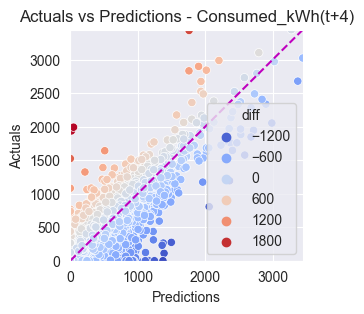

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Make sure that all values are float type.
df['diff'] = df['diff'].astype(float)
df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"] = df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"].astype(float)
df[f"{TARGET_COLUMN}(t-0)"] = df[f"{TARGET_COLUMN}(t-0)"].astype(float)

# Calculate absolute differences
df['abs_diff'] = df['diff'].abs()

# Calculate min and max values across both predictions and actuals to unify axes
max_val = np.max([df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"].max(), df[f"{TARGET_COLUMN}(t-0)"].max()])
min_val = np.min([df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"].min(), df[f"{TARGET_COLUMN}(t-0)"].min()])

# Plot the scatterplot
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x=f"{TARGET_COLUMN}(t-0)", y=f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})", hue='diff',
                palette='coolwarm', legend='brief', sizes=(20, 200))

# Add a 45 degree line
plt.plot([min_val, max_val], [min_val, max_val], 'm--')

# Set the axes limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add labels
plt.xlabel('Predictions')
plt.ylabel('Actuals')

plt.title(f'Actuals vs Predictions - {TARGET_COLUMN}(t+{FORECAST_HORIZON})')
plt.grid(True)

plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

TARGET_COLUMN = 'Consumed_kWh'
# TARGET_COLUMN = 'Blocked_kWh'
FORECAST_HORIZON = 4
MOVING_AVERAGE_WINDOW = 8  # Change this value to the desired window size

# Create a list to store the columns used to calculate the moving average
ma_columns = [f"{TARGET_COLUMN}(t-{i})" for i in range(MOVING_AVERAGE_WINDOW)]

# calculate moving average over the specified window
df['MovingAverage'] = df[ma_columns].mean(axis=1)

# calculate absolute difference between predicted and actual values
df['diff'] = df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"] - df['MovingAverage']

# calculate RMSE
rmse = sqrt(mean_squared_error(df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"], df['MovingAverage']))

# calculate MAE
mae = mean_absolute_error(df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"], df['MovingAverage'])

print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 61.2611376941955, MAE: 15.691693880095603


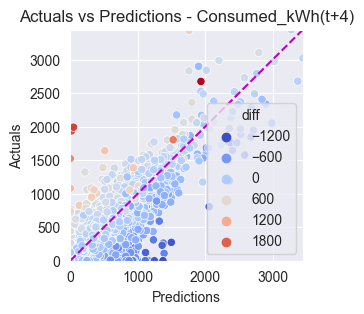

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Make sure that all values are float type.
df['diff'] = df['diff'].astype(float)
df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"] = df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"].astype(float)
df[f"{TARGET_COLUMN}(t-0)"] = df[f"{TARGET_COLUMN}(t-0)"].astype(float)

# Calculate absolute differences
df['abs_diff'] = df['diff'].abs()

# Calculate min and max values across both predictions and actuals to unify axes
max_val = np.max([df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"].max(), df[f"{TARGET_COLUMN}(t-0)"].max()])
min_val = np.min([df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"].min(), df[f"{TARGET_COLUMN}(t-0)"].min()])

# Plot the scatterplot
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x=f"{TARGET_COLUMN}(t-0)", y=f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})", hue='diff',
                palette='coolwarm', legend='brief', sizes=(20, 200))

# Add a 45 degree line
plt.plot([min_val, max_val], [min_val, max_val], 'm--')

# Set the axes limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add labels
plt.xlabel('Predictions')
plt.ylabel('Actuals')

plt.title(f'Actuals vs Predictions - {TARGET_COLUMN}(t+{FORECAST_HORIZON})')
plt.grid(True)

plt.show()

Text(0, 0.5, 'Count')

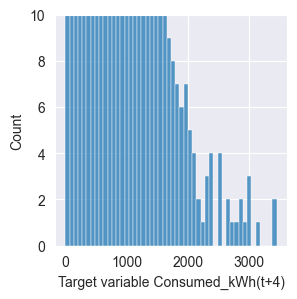

In [8]:
# Plot the distribution of the target variable
plt.figure(figsize=(3, 3))
sns.histplot(data=df, x=f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})", bins=50, kde=False)
plt.ylim(0,10)
# limit y-axis to the 1% of max of count for largest bin


# Add labels
plt.xlabel(f'Target variable {TARGET_COLUMN}(t+{FORECAST_HORIZON})')
plt.ylabel('Count')

In [9]:
# filter df to only include rows where the target variable is greater than 3500
df = df[df[f"{TARGET_COLUMN}(t+{FORECAST_HORIZON})"] > 3500]

In [10]:
df

,PC6,Date,Consumed_kWh(t+4),Consumed_kWh(t+3),Consumed_kWh(t+2),Consumed_kWh(t+1),Consumed_kWh(t-0),Consumed_kWh(t-1),Consumed_kWh(t-2),Consumed_kWh(t-3),Consumed_kWh(t-4),Consumed_kWh(t-5),Consumed_kWh(t-6),Consumed_kWh(t-7),Blocked_kWh(t+4),Blocked_kWh(t+3),Blocked_kWh(t+2),Blocked_kWh(t+1),Blocked_kWh(t-0),Blocked_kWh(t-1),Blocked_kWh(t-2),Blocked_kWh(t-3),Blocked_kWh(t-4),Blocked_kWh(t-5),Blocked_kWh(t-6),Blocked_kWh(t-7),Consumed_kWh_lag(t-0),Consumed_kWh_lag(t-1),Consumed_kWh_lag(t-2),Consumed_kWh_lag(t-3),Consumed_kWh_lag(t-4),Consumed_kWh_lag(t-5),Consumed_kWh_lag(t-6),Consumed_kWh_lag(t-7),Blocked_kWh_lag(t-0),Blocked_kWh_lag(t-1),Blocked_kWh_lag(t-2),Blocked_kWh_lag(t-3),Blocked_kWh_lag(t-4),Blocked_kWh_lag(t-5),Blocked_kWh_lag(t-6),Blocked_kWh_lag(t-7),MaxPower(t+4),MaxPower(t+3),MaxPower(t+2),MaxPower(t+1),MaxPower(t-0),number_of_chargers(t+4),number_of_chargers(t+3),number_of_chargers(t+2),number_of_chargers(t+1),number_of_chargers(t-0),PC6_WeekIndex,WeekIndex,SinWeekOfYear,CosWeekOfYear,SinMonthOfYear,CosMonthOfYear,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,diff,abs_diff,MovingAverage
